In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import LabelEncoder



sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 14

In [2]:
data = pd.read_csv("../data/customer_churn_dataset-testing-master.csv")
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [4]:
data.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


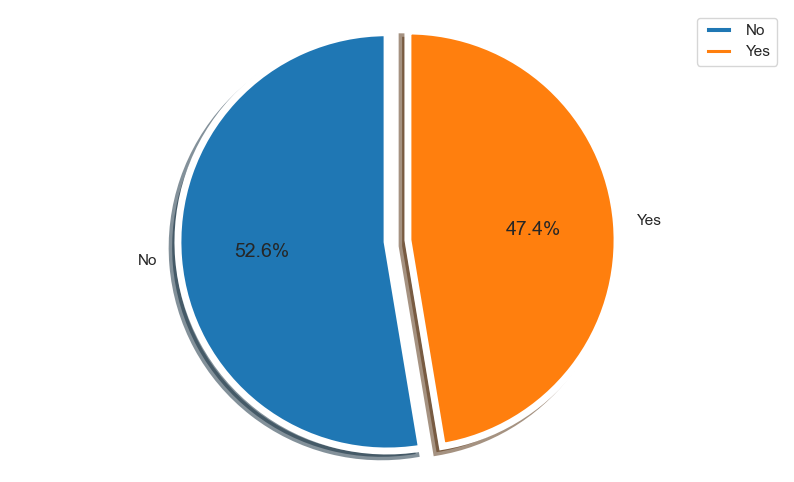

In [7]:
plt.pie(data['Churn'].value_counts(), labels = ['No','Yes'],autopct='%1.1f%%' , explode=[0,0.1] , shadow=True , startangle=90 , colors=['#1f77b4','#ff7f0e'] , wedgeprops={'linewidth': 5})
plt.axis('equal')
plt.legend()
plt.show()

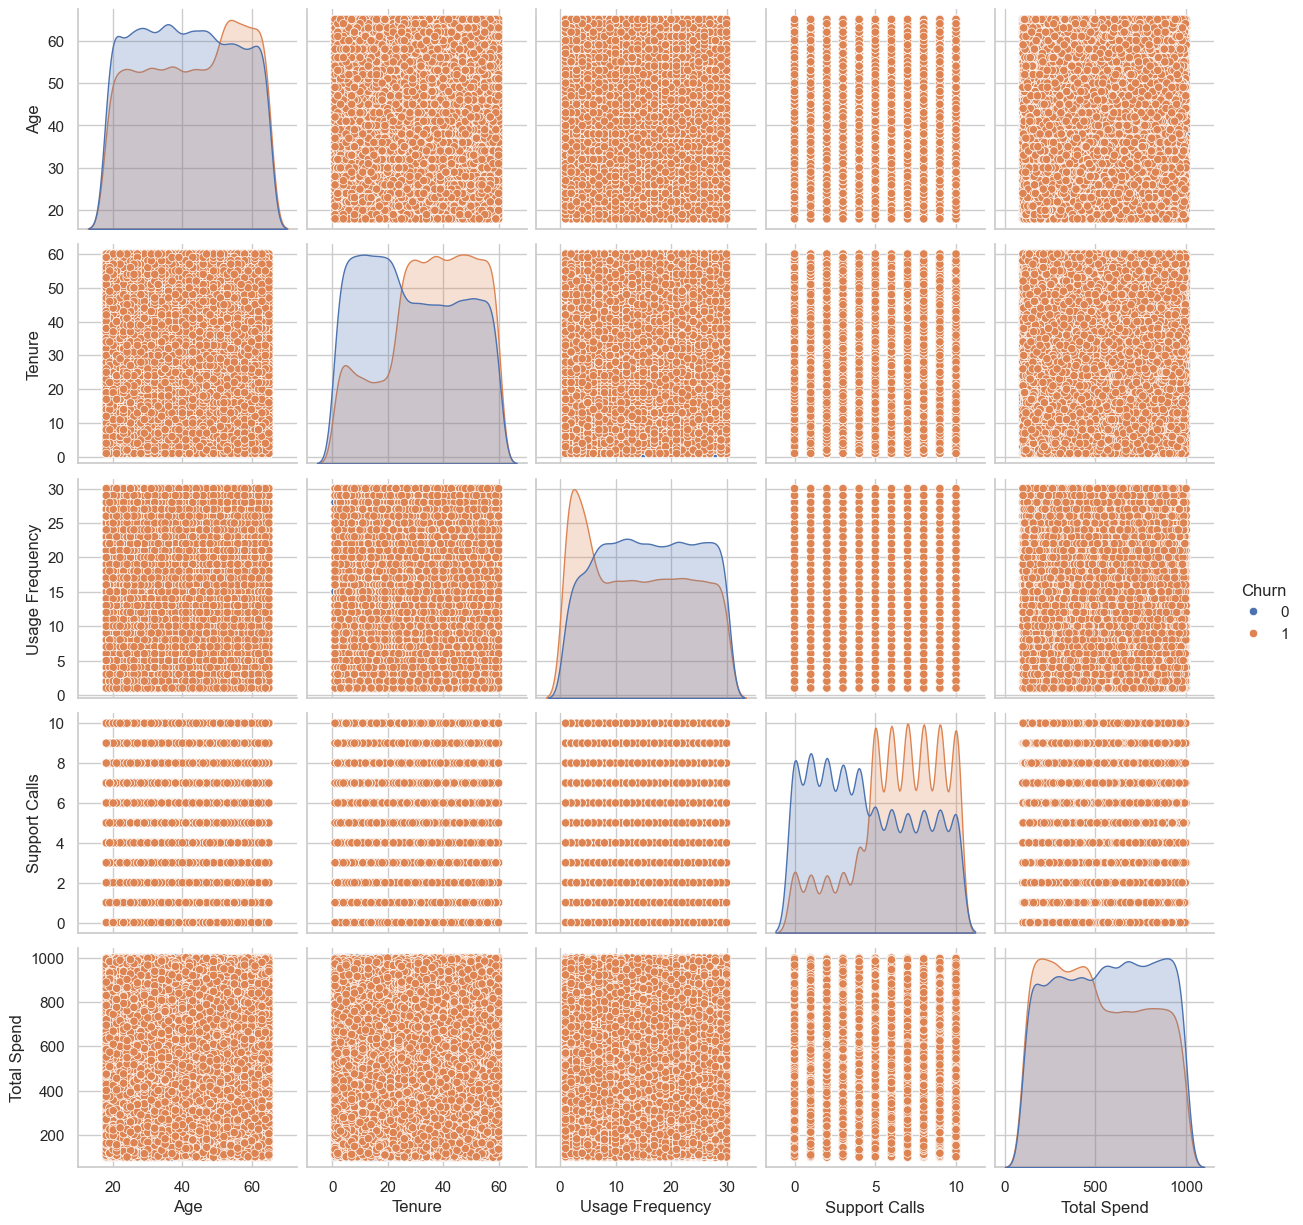

In [8]:
sns.pairplot(data[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Total Spend',"Churn"]], hue='Churn')
plt.show()

In [9]:
def count_plot(data , col):
    sns.countplot(data = data , x = col , hue= 'Churn')
    plt.xlabel(col)
    plt.show()
    print(data[col].value_counts())
    print(data['Churn'].value_counts())


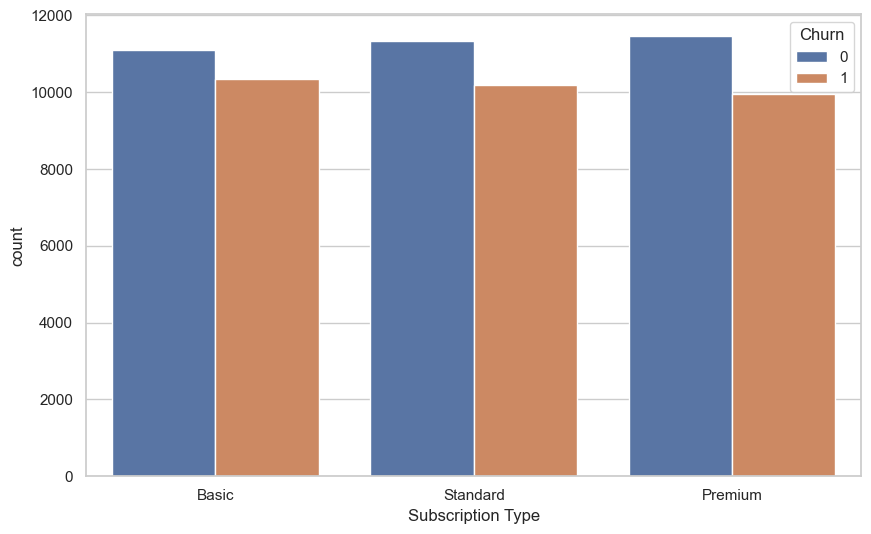

Subscription Type
Standard    21502
Basic       21451
Premium     21421
Name: count, dtype: int64
Churn
0    33881
1    30493
Name: count, dtype: int64


In [10]:
count_plot(data=data , col='Subscription Type')

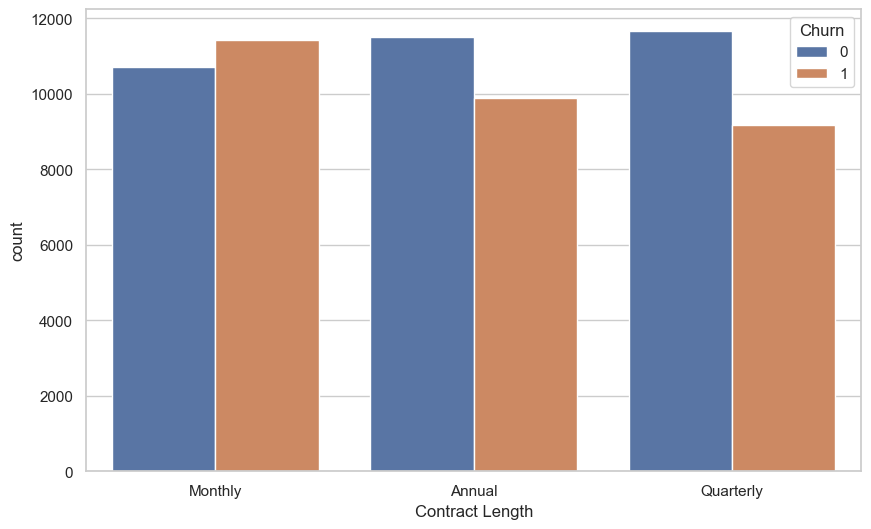

Contract Length
Monthly      22130
Annual       21410
Quarterly    20834
Name: count, dtype: int64
Churn
0    33881
1    30493
Name: count, dtype: int64


In [11]:
count_plot(data , col='Contract Length')

In [12]:
def type_columns(data):

    categorical_columns = [col for col in data.columns if data[col].dtype == 'O']
    numerical_columns = [col for col in data.columns if data[col].dtype != 'O']

    return categorical_columns , numerical_columns

categorycal_columns , numerical_columns = type_columns(data)

print("numerical_columns is : \n" , numerical_columns)
print("categorycal_columns is : \n " , categorycal_columns)


numerical_columns is : 
 ['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']
categorycal_columns is : 
  ['Gender', 'Subscription Type', 'Contract Length']


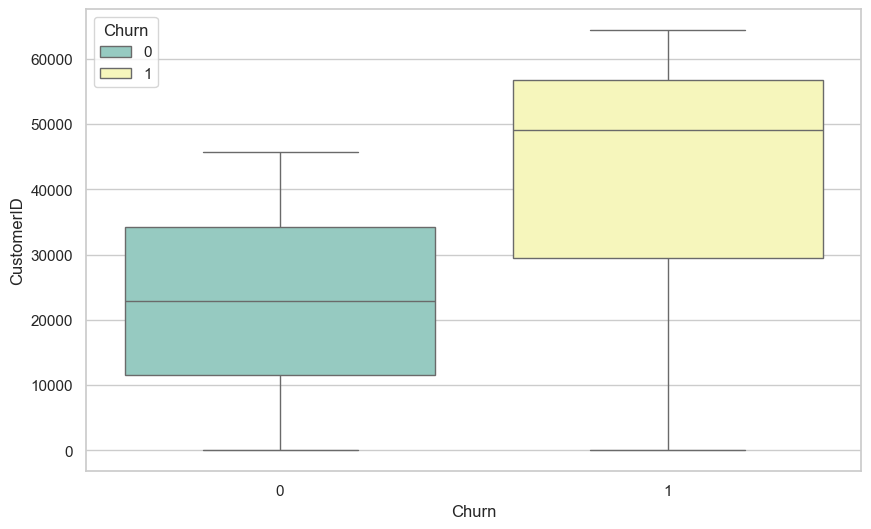

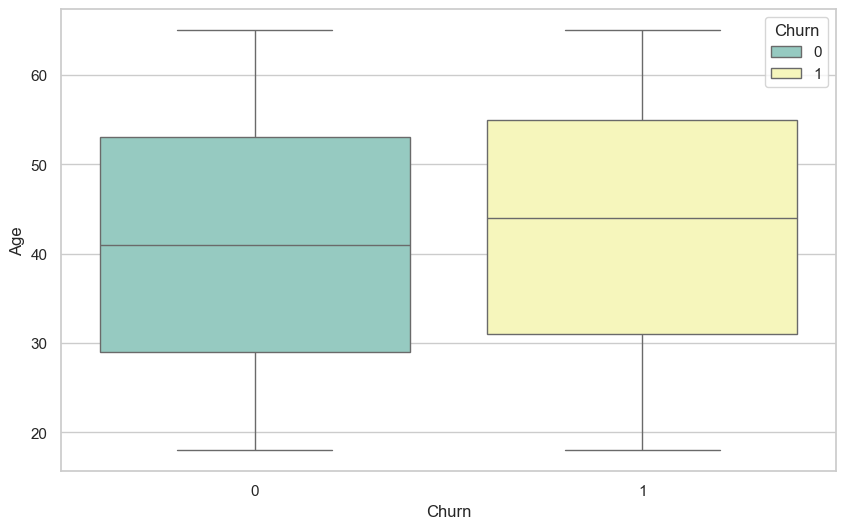

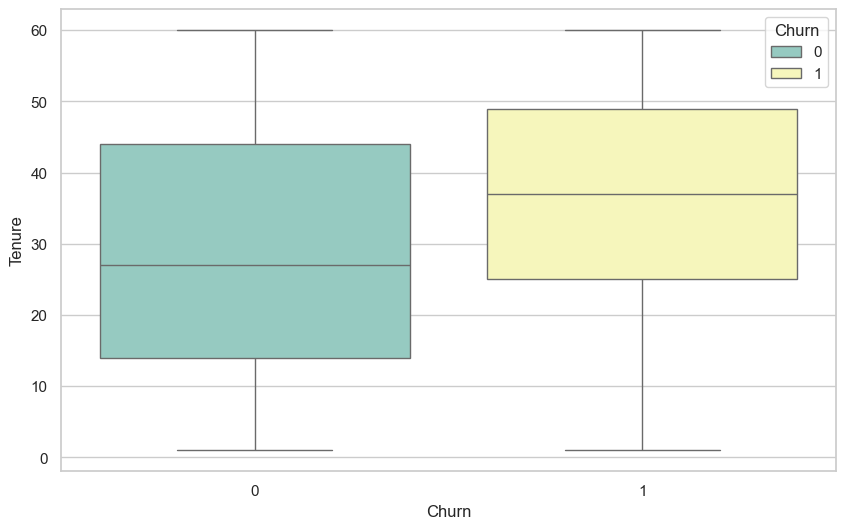

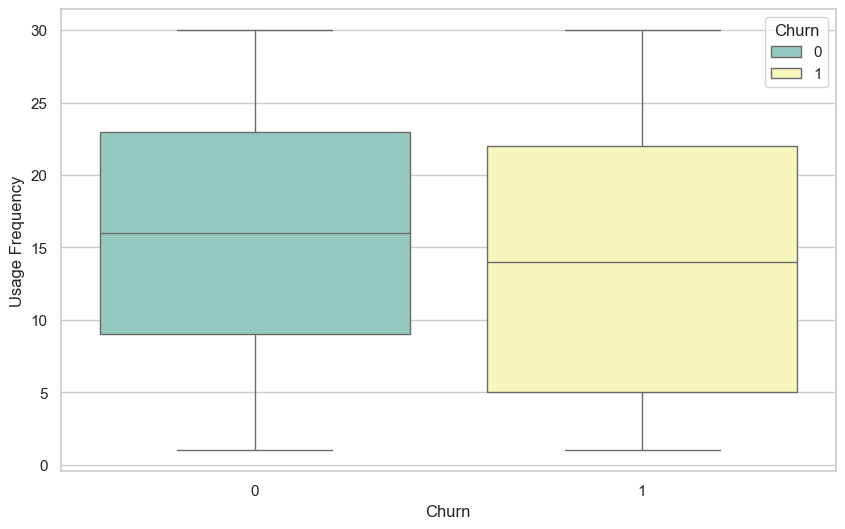

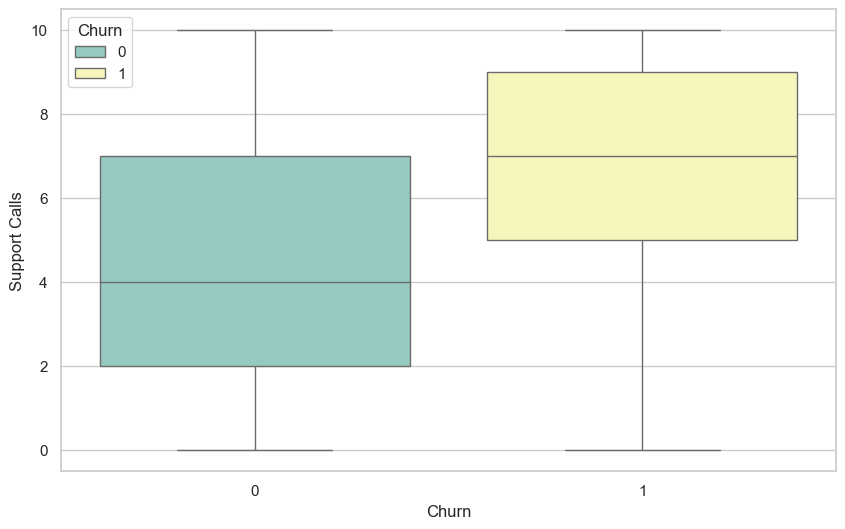

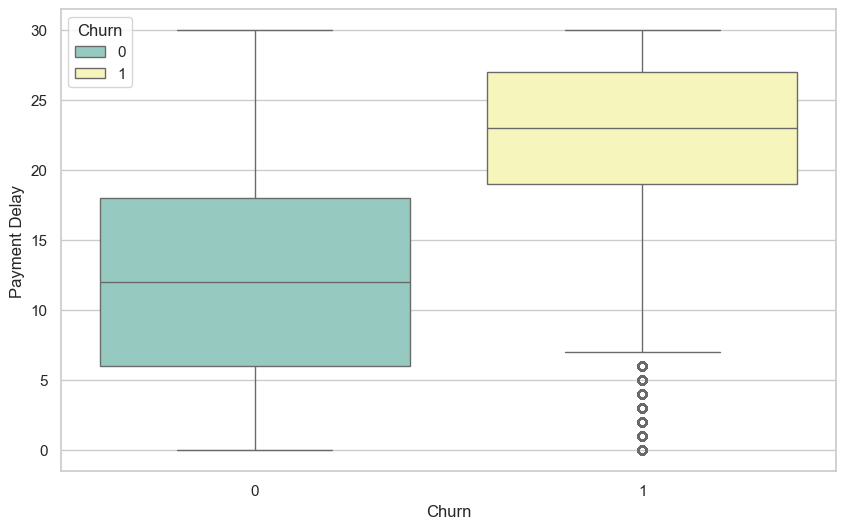

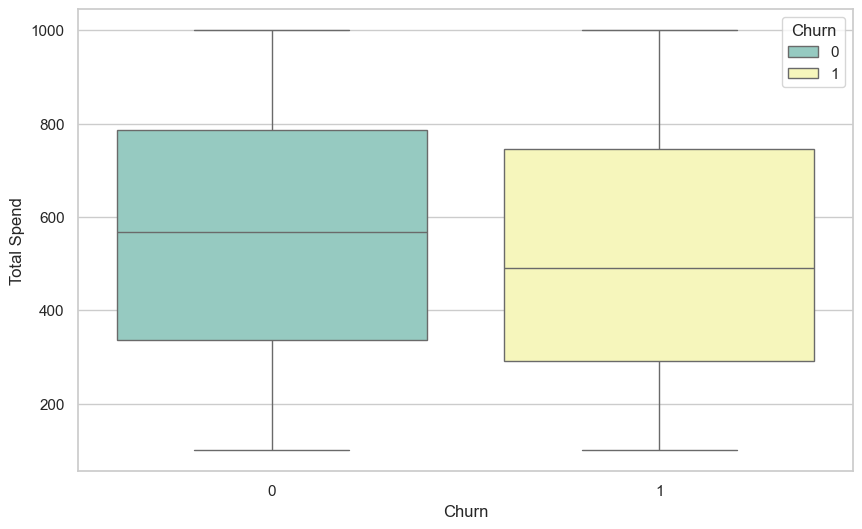

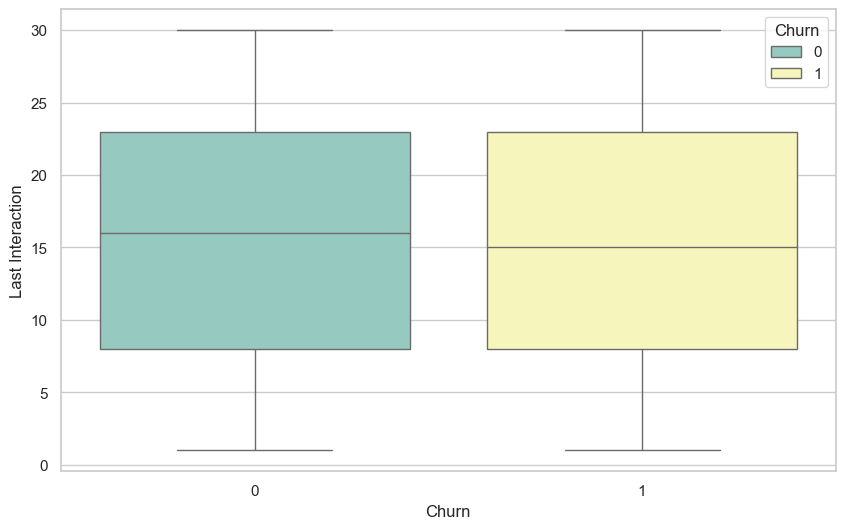

In [13]:
for column in numerical_columns[:-1]:
    sns.boxplot(data=data , x='Churn' , y=column , palette="Set3" , hue='Churn')
    plt.show()

In [14]:
le = LabelEncoder()
for col in data[categorycal_columns]:
    data[col] = le.fit_transform(data[col])

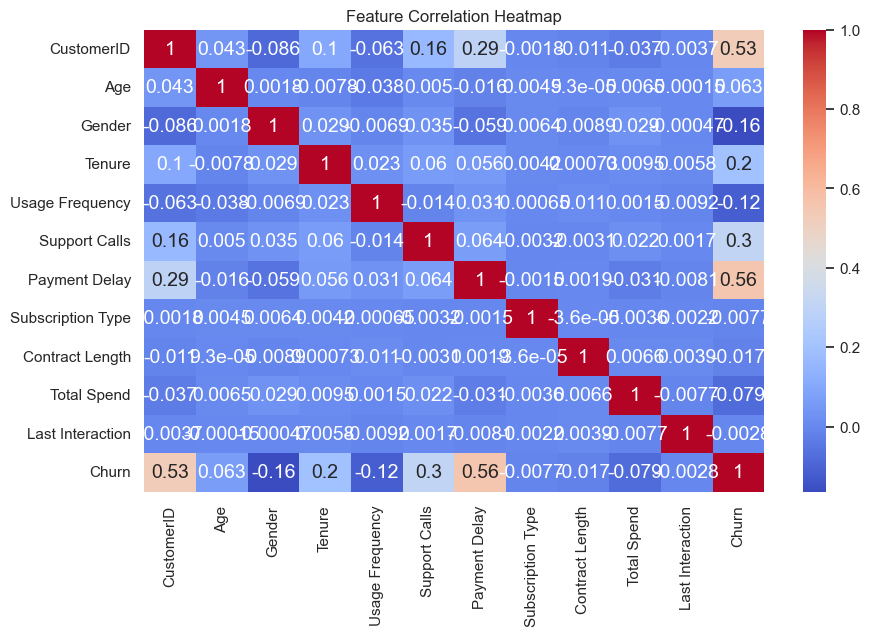

In [15]:
corr = data.corr()
sns.heatmap(corr , annot=True , cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [16]:
for column in numerical_columns:
    statistic , p_value = shapiro(data[column])
    print(f'{column} : p_value {p_value:.4f} --> {"Not Normal" if p_value < 0.05 else "Normal"}')

CustomerID : p_value 0.0000 --> Not Normal
Age : p_value 0.0000 --> Not Normal
Tenure : p_value 0.0000 --> Not Normal
Usage Frequency : p_value 0.0000 --> Not Normal
Support Calls : p_value 0.0000 --> Not Normal
Payment Delay : p_value 0.0000 --> Not Normal
Total Spend : p_value 0.0000 --> Not Normal
Last Interaction : p_value 0.0000 --> Not Normal
Churn : p_value 0.0000 --> Not Normal


c:\Users\T A T\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
